In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
plt.rcParams.update({
    'figure.dpi': 150,       # Higher resolution
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axes label font size
    'xtick.labelsize': 10,   # X-tick font size
    'ytick.labelsize': 10,   # Y-tick font size
    'legend.fontsize': 10    # Legend font size
})

In [155]:
# Load the dataset
df = pd.read_csv("Delhi_10_12_results.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   District                                        16 non-null     object 
 1   No of Zone                                      16 non-null     int64  
 2   No of Schools - Primary                         16 non-null     int64  
 3   No of Schools - Middle                          16 non-null     int64  
 4   No of Schools - Sec                             16 non-null     int64  
 5   No of Schools - Sr. Sec                         16 non-null     int64  
 6   No of Schools - Total                           16 non-null     int64  
 7   No of Students - Pre Primary                    16 non-null     int64  
 8   No of Students - Primary                        16 non-null     int64  
 9   No of Students - Middle                      

In [157]:
# Data Cleaning and Preprocessing
df.columns = df.columns.str.strip().str.replace(' - ', '_', regex=False).str.replace(' ', '_', regex=False)
# Renaming selected columns
df = df.rename(columns={
    'No_of_Schools_Sr._Sec': 'No_of_Schools_Sr_Sec',
    'No_of_Students_Pre_Primary': 'Students_Pre_Primary',
    'No_of_Students_Sr_Secondary': 'Students_Sr_Secondary',
    'No_of_Students_Total': 'Students_Total',
    'Class_X_and_XII_Result_-_DISTRICT': 'Result_District',
    'NUMBER_OF_STUDENTS_APPEARED_IN_CLASS_X': 'Appeared_Class_X',
    'TOTAL_NUMBER_OF_STUDENTS_PASSED_IN_CLASS_X': 'Passed_Class_X',
    'PASS_PERCENTAGE_IN_CLASS_X': 'Pass_Pct_Class_X',
    'QUALITY_INDEX_IN_CLASS_X': 'QI_Class_X',
    'TOTAL_NUMBER_OF_STUDENTS_APPEARED_IN_CLASS_XII': 'Appeared_Class_XII',
    'TOTAL_NUMBER_OF_STUDENTS_PASSED_IN_CLASS_XII': 'Passed_Class_XII',
    'PASS_PERCENTAGE_IN_CLASS_XII': 'Pass_Pct_Class_XII',
    'QUALITY_INDEX_IN_CLASS_XII': 'QI_Class_XII'
})
print("Columns names as finalized for analysis: ",df.columns)
print(len(df.columns))

Columns names as finalized for analysis:  Index(['District', 'No_of_Zone', 'No_of_Schools_Primary',
       'No_of_Schools_Middle', 'No_of_Schools_Sec', 'No_of_Schools_Sr_Sec',
       'No_of_Schools_Total', 'Students_Pre_Primary', 'No_of_Students_Primary',
       'No_of_Students_Middle', 'No_of_Students_Secondary',
       'Students_Sr_Secondary', 'No_of_Students_Boys', 'No_of_Students_Girls',
       'Students_Total', 'Class_X_and_XII_Result_DISTRICT', 'Appeared_Class_X',
       'Passed_Class_X', 'Pass_Pct_Class_X', 'QI_Class_X',
       'Appeared_Class_XII', 'Passed_Class_XII', 'Pass_Pct_Class_XII',
       'QI_Class_XII'],
      dtype='object')
24


In [159]:
df = df.drop(columns=['Class_X_and_XII_Result_DISTRICT'])

In [161]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
District,East,North East-I,North,North West A,North West B-I,West A,West B,South West A,South West B-I,South,New Delhi,Central,South East,North East-II,North West B-II,South West B-II
No_of_Zone,3,1,2,2,2,3,2,2,1,2,1,2,2,2,1,1
No_of_Schools_Primary,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
No_of_Schools_Middle,1,2,4,0,0,0,0,0,0,0,0,2,3,4,0,0
No_of_Schools_Sec,8,2,8,7,0,1,6,1,2,9,0,3,5,14,4,1
No_of_Schools_Sr_Sec,111,44,53,110,84,58,78,38,48,61,3,35,92,67,44,47
No_of_Schools_Total,121,48,65,117,84,59,84,39,50,70,3,40,100,85,48,48
Students_Pre_Primary,3714,712,2023,2553,3997,2280,2750,1492,1552,2513,70,1238,2477,2078,1477,568
No_of_Students_Primary,18017,3610,9128,11034,15676,9563,11573,6389,6586,8215,303,5386,12100,8679,6841,3043
No_of_Students_Middle,72599,49688,29545,82575,58992,36687,76683,18599,33752,45633,397,11171,69460,60161,27211,15805


<Figure size 1800x900 with 0 Axes>

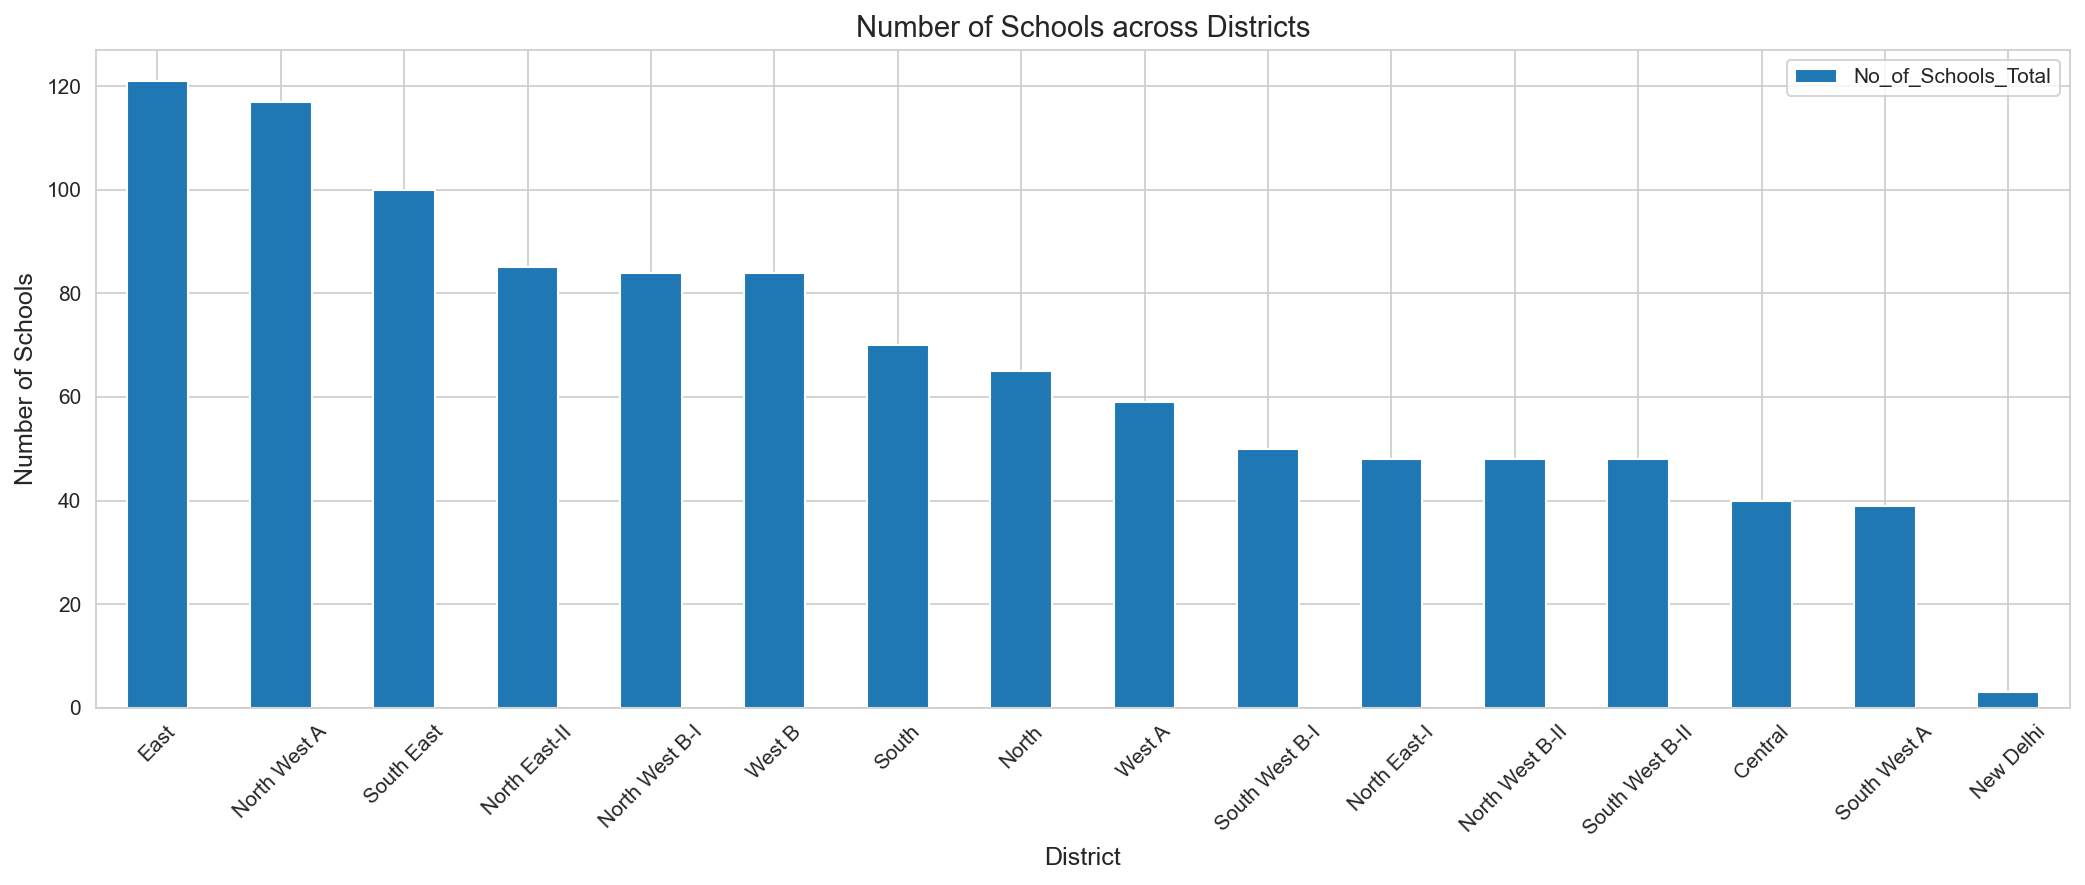

In [222]:
# Schools Distribution
df_sorted = df.sort_values('No_of_Schools_Total', ascending=False)

plt.figure(figsize=(12,6))
df_sorted.plot(x="District", y=["No_of_Schools_Total"],
        kind="bar", figsize=(14,6))
plt.title("Number of Schools across Districts")
plt.ylabel("Number of Schools")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Schools_districts.png')
plt.show()

<Figure size 1800x900 with 0 Axes>

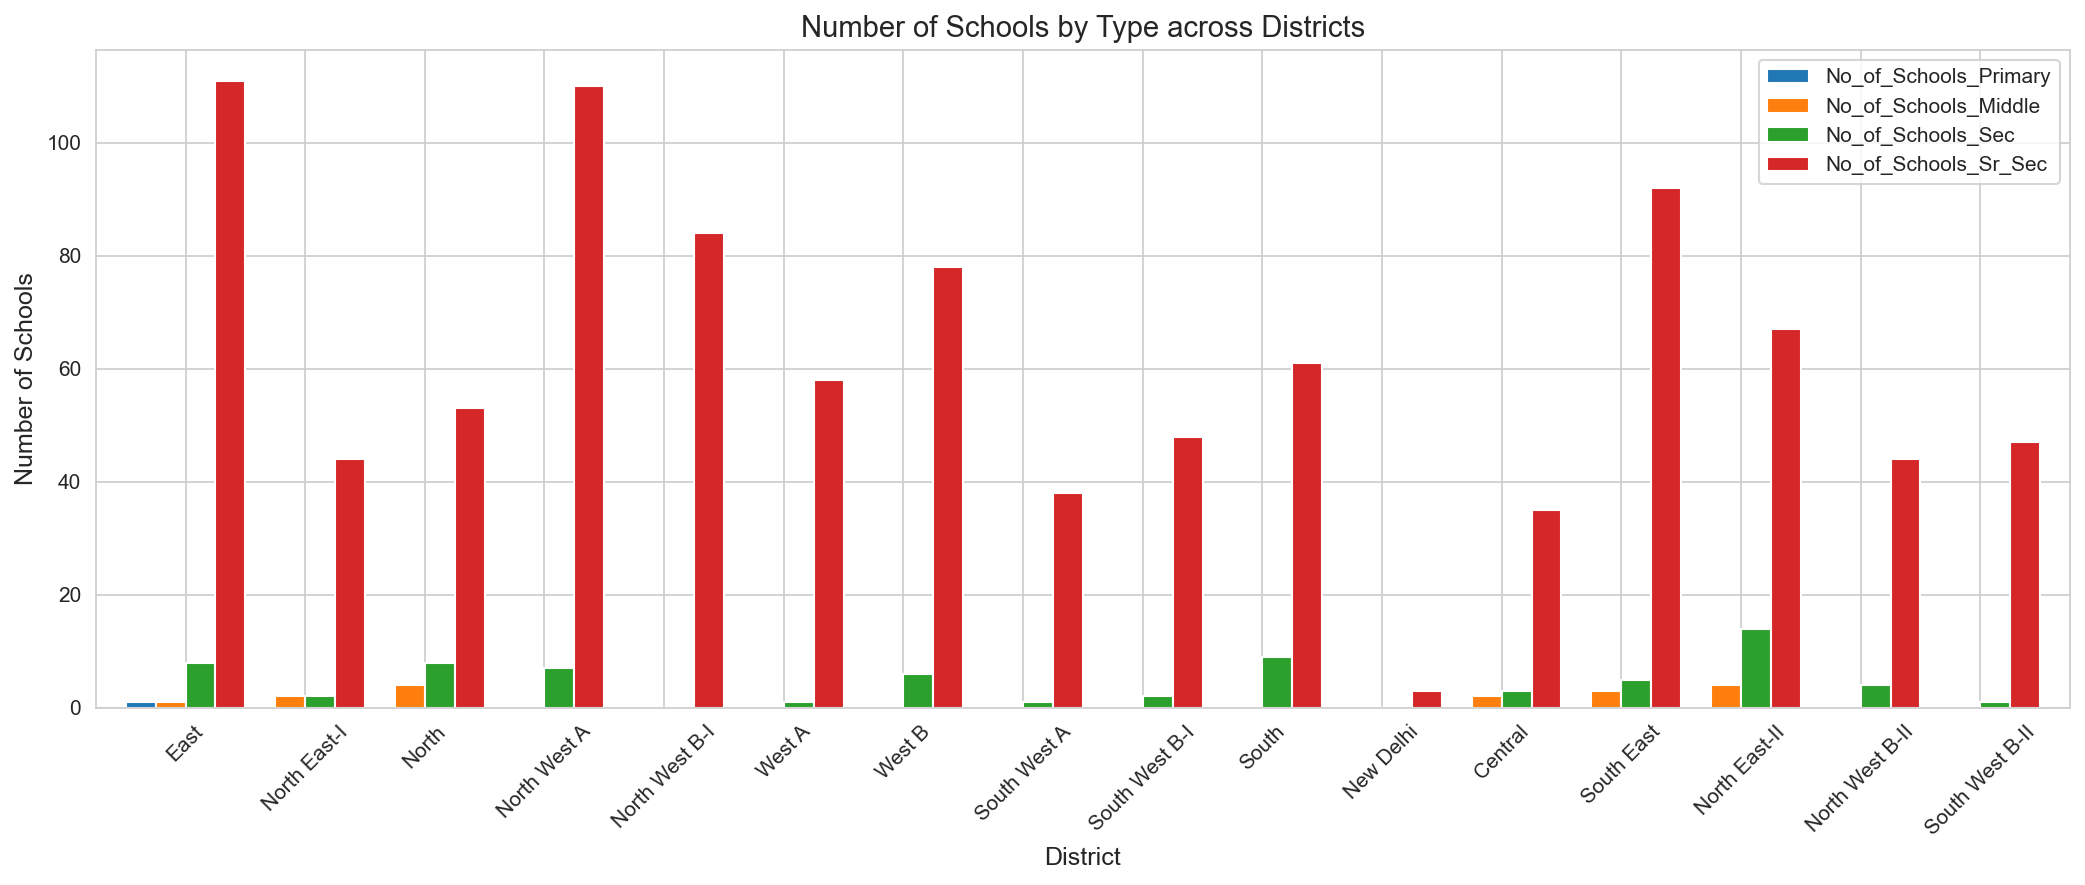

In [224]:
# Schools Distribution by type

plt.figure(figsize=(12,6))
df.plot(x="District", y=["No_of_Schools_Primary","No_of_Schools_Middle","No_of_Schools_Sec","No_of_Schools_Sr_Sec"],
        kind="bar", figsize=(14,6), width=1)
plt.title("Number of Schools by Type across Districts")
plt.ylabel("Number of Schools")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('school_type_districts.png')
plt.show()

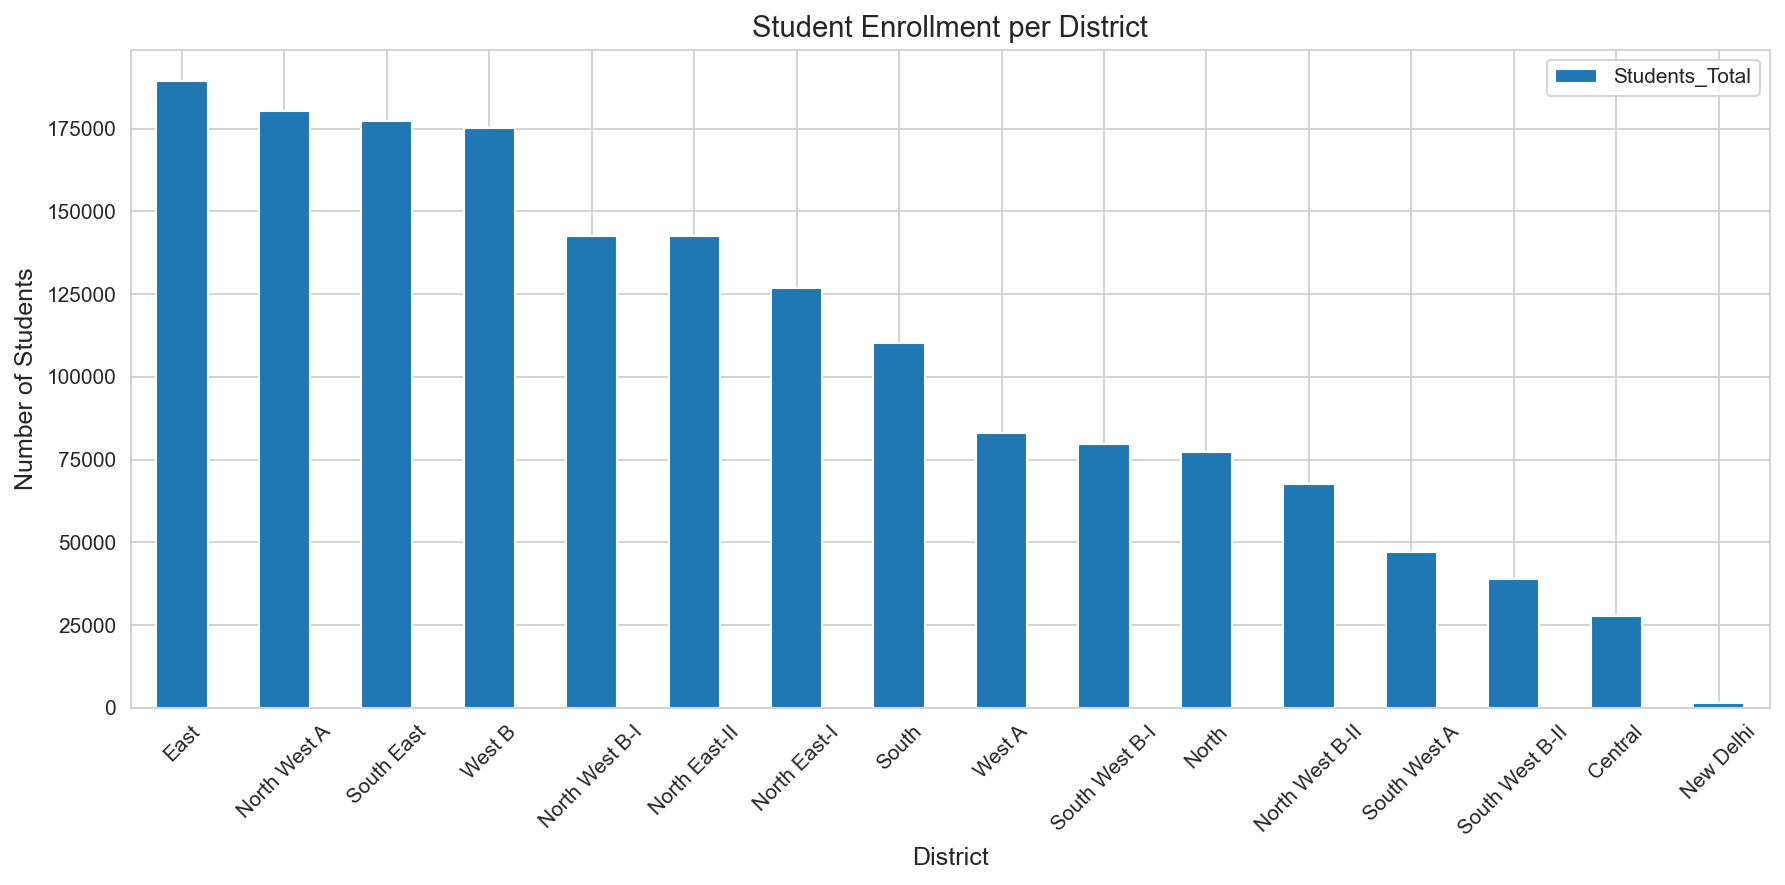

In [226]:
# Student Enrollment
df_sorted = df.sort_values('Students_Total', ascending=False)

df_sorted.plot(x="District", y=["Students_Total"],
        kind="bar", figsize=(12,6))
plt.title("Student Enrollment per District")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('student_districts.png')
plt.show()

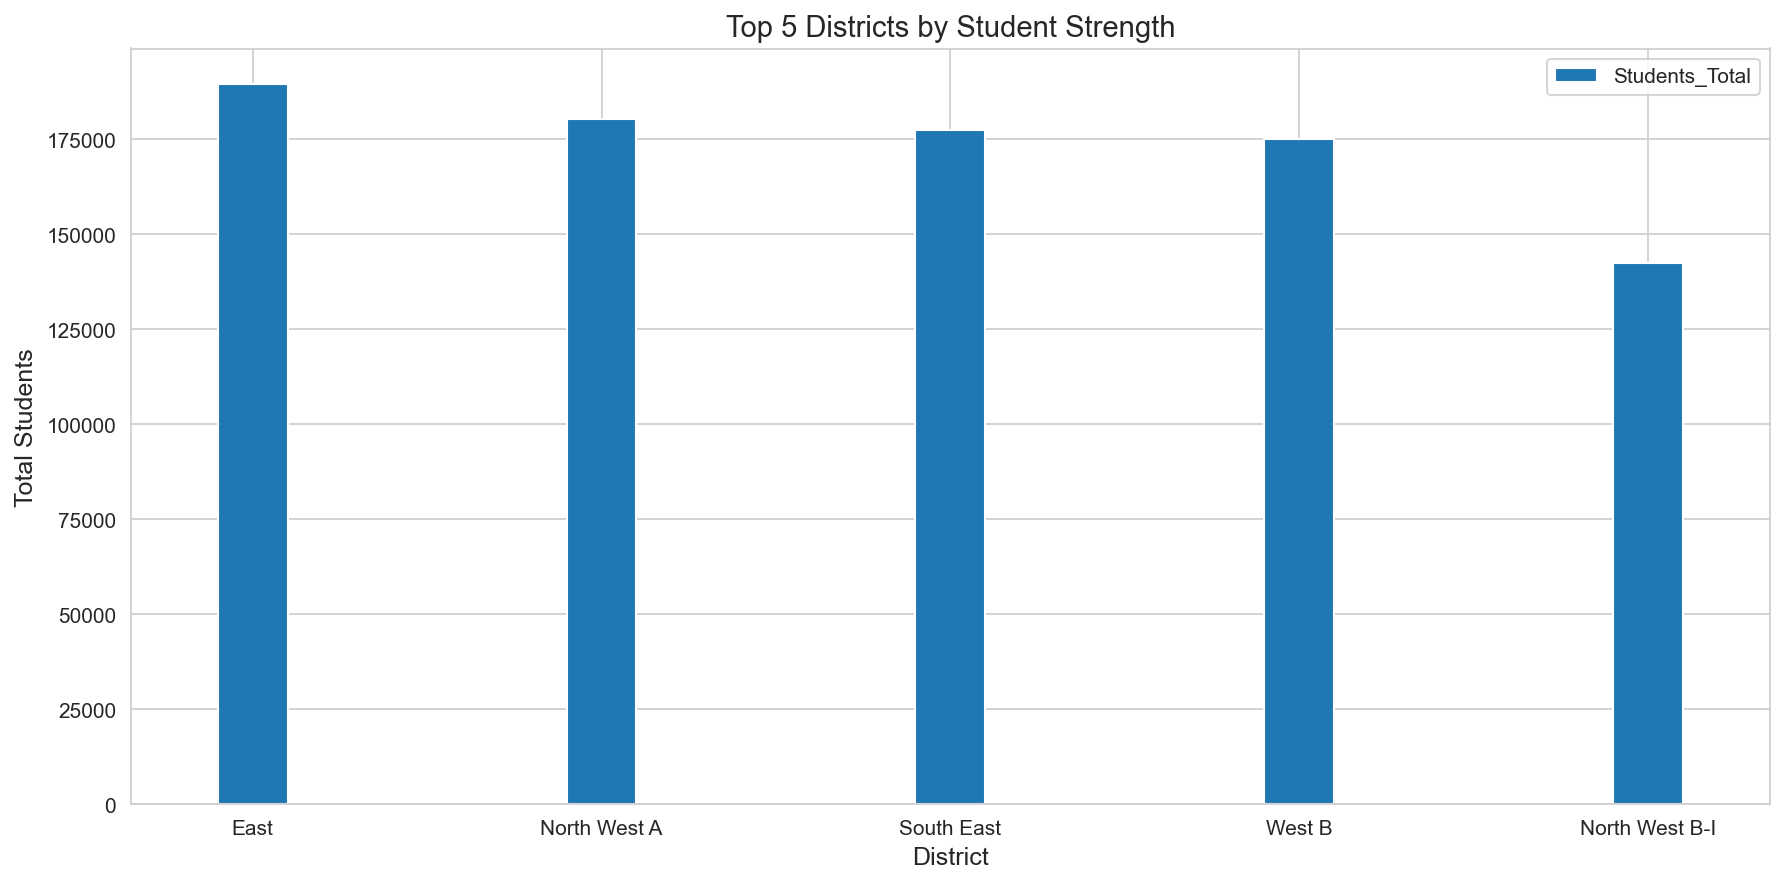

In [228]:
# Top 5 Districts by Student Strength
top_students = df.sort_values("Students_Total", ascending=False).head(5)
top_students.plot(x="District", y="Students_Total", kind="bar", figsize=(12,6), width=0.2)
plt.title("Top 5 Districts by Student Strength")
plt.ylabel("Total Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('top5_student_districts.png')
plt.show()

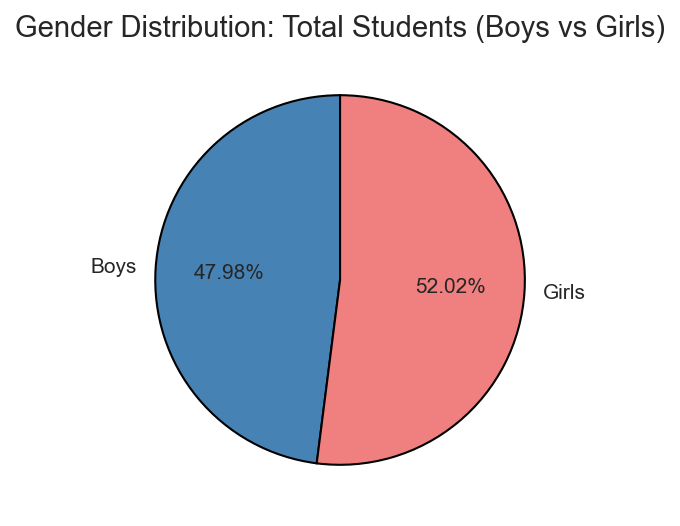

In [230]:
# Totals
total_boys = df["No_of_Students_Boys"].sum()
total_girls = df["No_of_Students_Girls"].sum()

# Data
labels = ["Boys", "Girls"]
sizes = [total_boys, total_girls]
colors = ["steelblue", "lightcoral"]

# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title("Gender Distribution: Total Students (Boys vs Girls)")
plt.savefig('boys_girls.png')
plt.show()

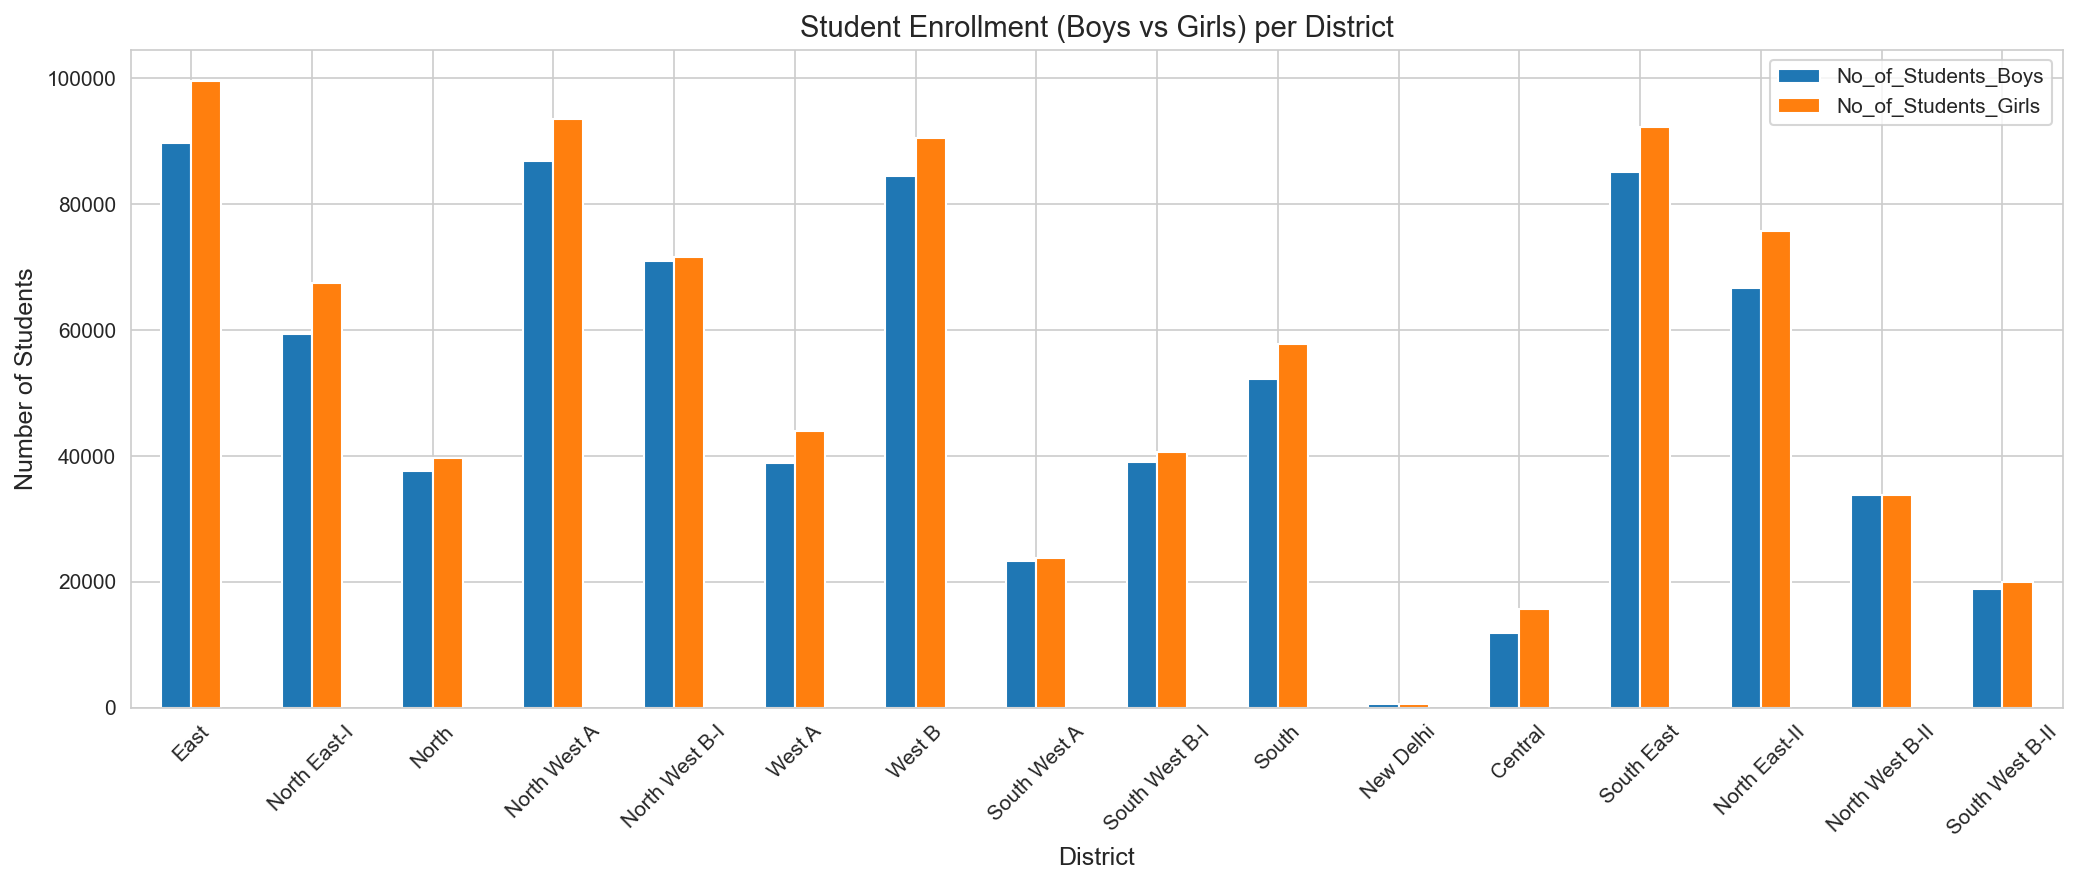

In [232]:
# Student Enrollment (Boys vs Girls)
df.plot(x="District", y=["No_of_Students_Boys","No_of_Students_Girls"],
        kind="bar", figsize=(14,6))
plt.title("Student Enrollment (Boys vs Girls) per District")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boys_girls_district.png')
plt.show()

/var/folders/82/wb5_dnks4zb6g40qq9_mxf1h0000gn/T/ipykernel_6419/3479239394.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["Pass_Pct_Class_X"], df["Pass_Pct_Class_XII"]],


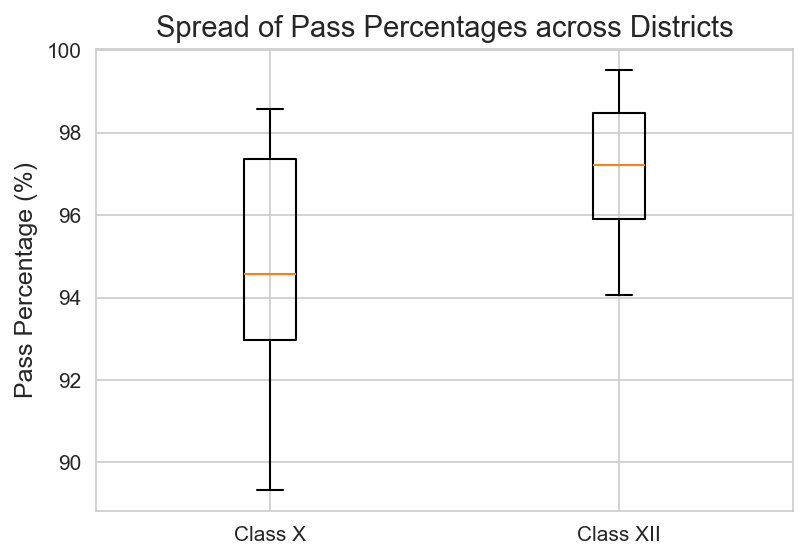

In [234]:
# Boxplot: Spread of Pass %
plt.figure(figsize=(6,4))
plt.boxplot([df["Pass_Pct_Class_X"], df["Pass_Pct_Class_XII"]],
            labels=["Class X", "Class XII"])
plt.title("Spread of Pass Percentages across Districts")
plt.ylabel("Pass Percentage (%)")
plt.savefig('pass_pct_boxplot.png')
plt.show()

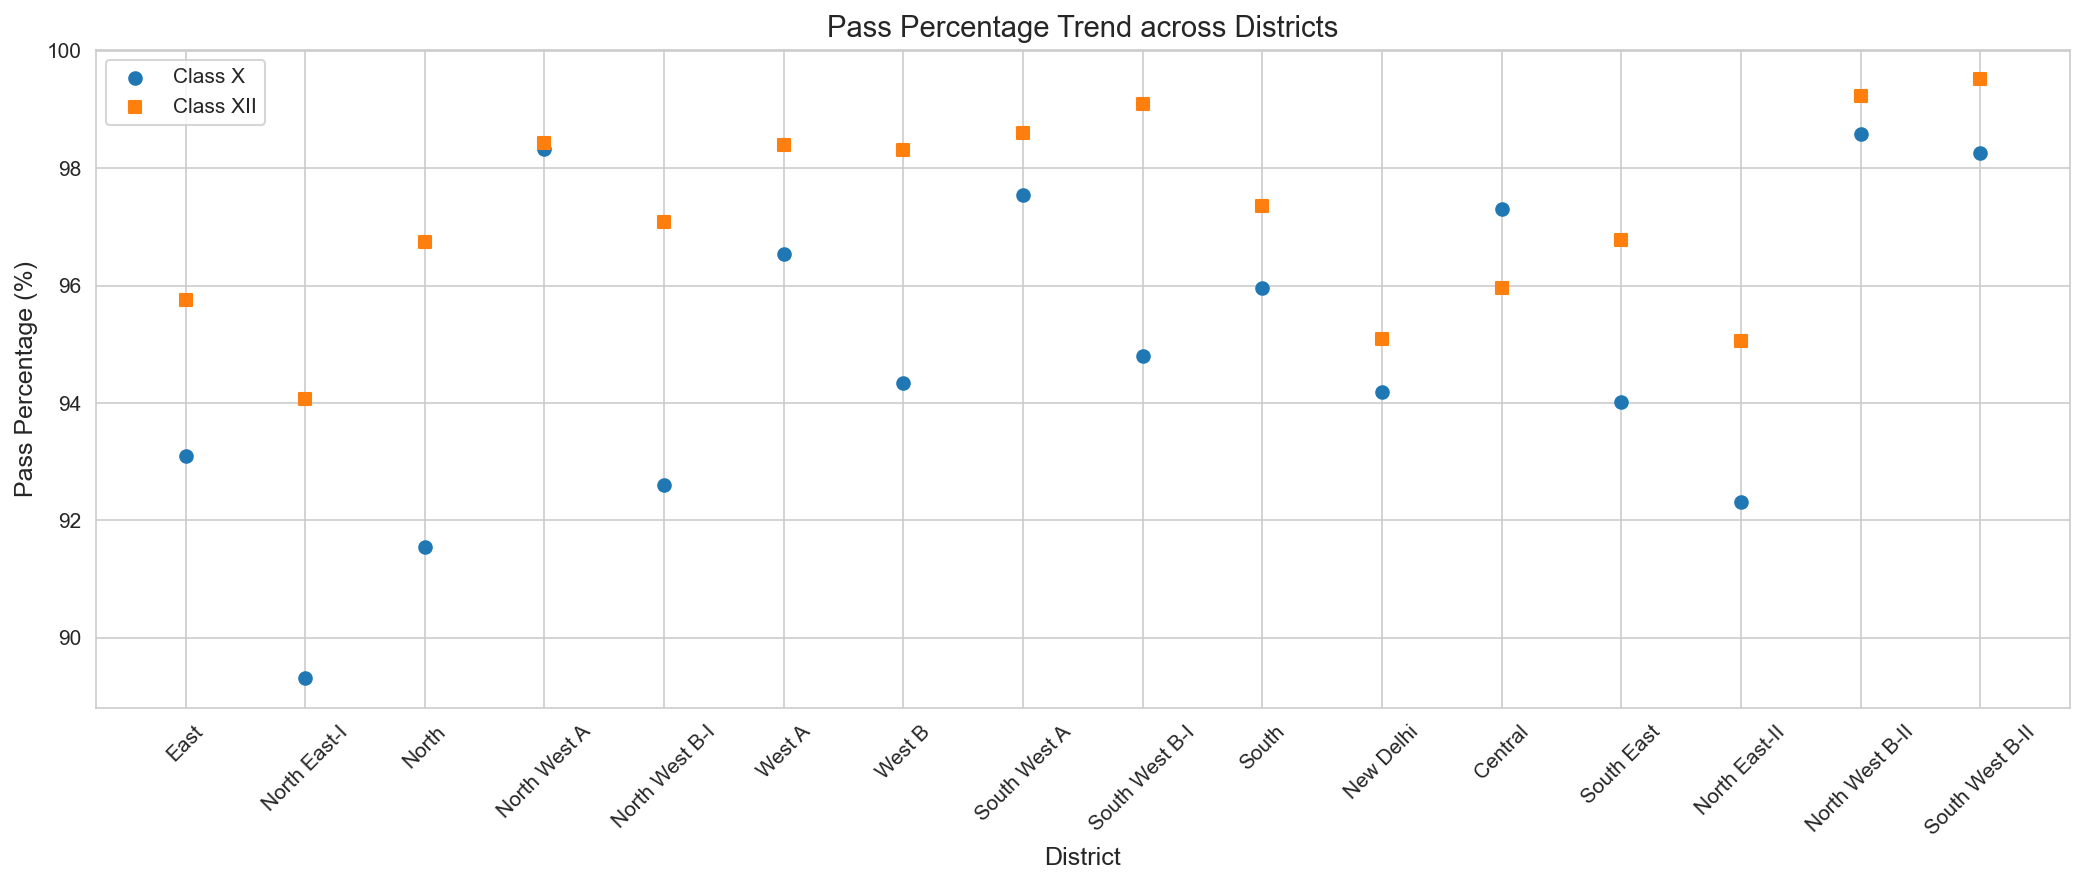

In [236]:
# Scatter Plot: Pass % Trend
plt.figure(figsize=(14,6))
plt.scatter(df["District"], df["Pass_Pct_Class_X"], marker="o", label="Class X")
plt.scatter(df["District"], df["Pass_Pct_Class_XII"], marker="s", label="Class XII")
plt.title("Pass Percentage Trend across Districts")
plt.xlabel("District")
plt.ylabel("Pass Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('pass_pct_scatter.png')
plt.show()

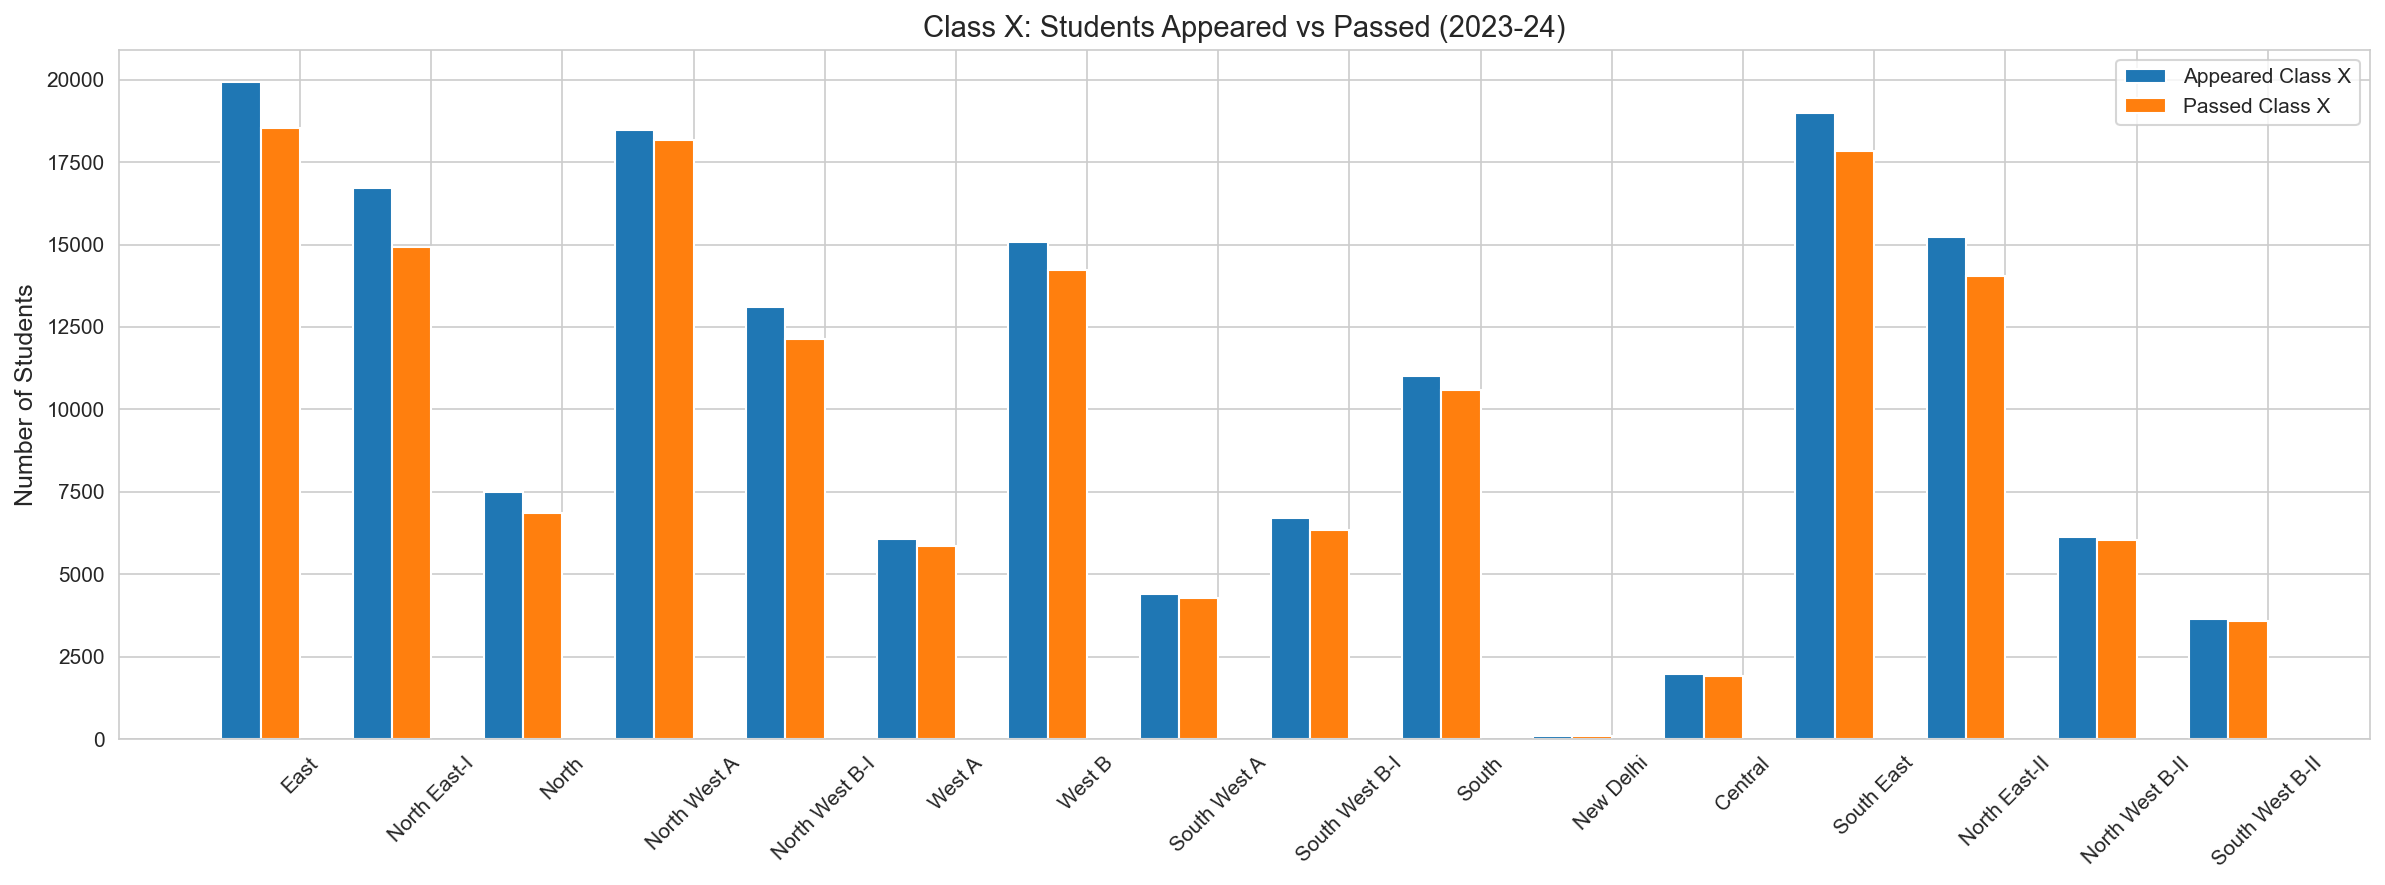

In [238]:
districts = df["District"]
appeared_x = df["Appeared_Class_X"]
passed_x = df["Passed_Class_X"]


x = np.arange(len(districts))  # the label locations
width = 0.3  # bar width

plt.figure(figsize=(16,6))

# Bars
plt.bar(x - width*1.5, appeared_x, width, label="Appeared Class X")
plt.bar(x - width*0.5, passed_x, width, label="Passed Class X")


# Labels
plt.xticks(x, districts, rotation=45)
plt.ylabel("Number of Students")
plt.title("Class X: Students Appeared vs Passed (2023-24)")
plt.legend()
plt.tight_layout()
plt.savefig('classX_pass_appeared.png')
plt.show()

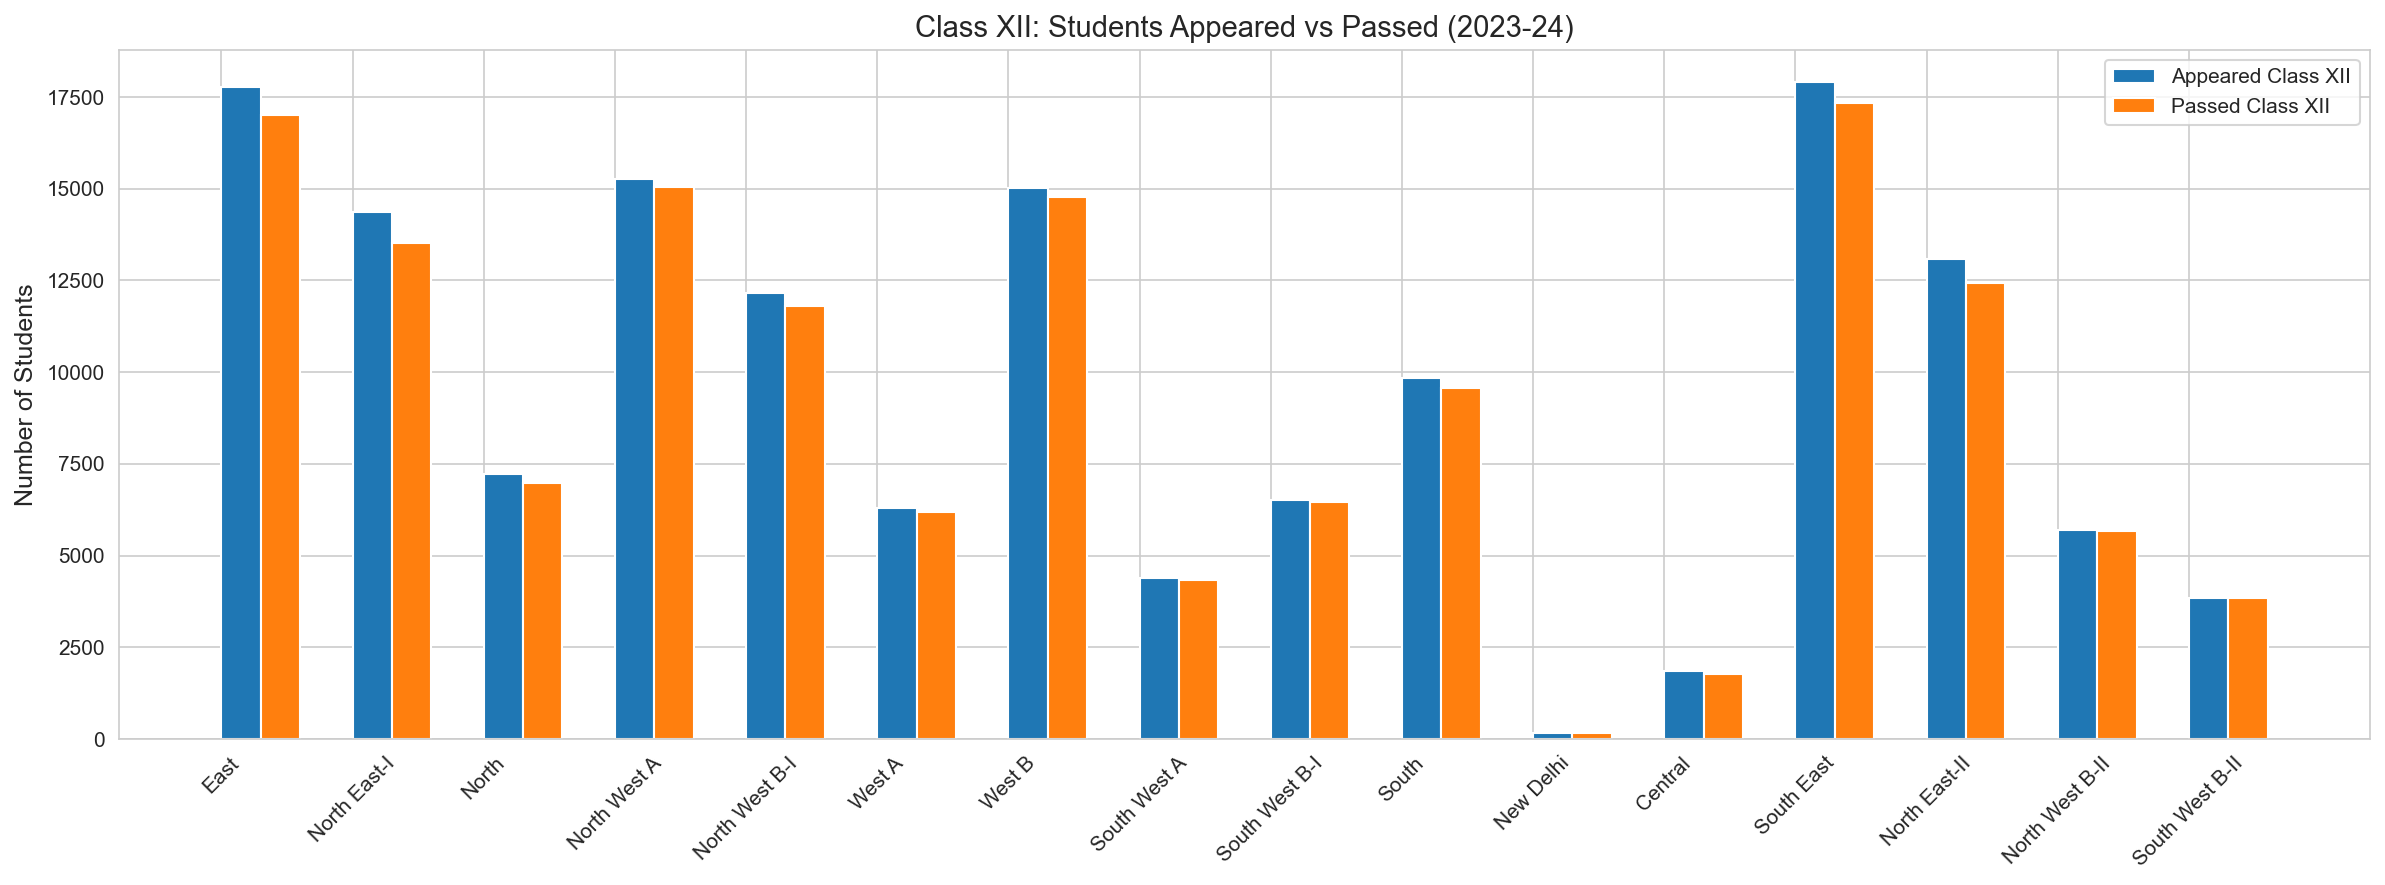

In [240]:
districts = df["District"]
appeared_xii = df["Appeared_Class_XII"]
passed_xii = df["Passed_Class_XII"]

x = np.arange(len(districts))
width = 0.3

plt.figure(figsize=(16,6))

# Bars
plt.bar(x + width*0.5, appeared_xii, width, label="Appeared Class XII")
plt.bar(x + width*1.5, passed_xii, width, label="Passed Class XII")

# Labels
plt.xticks(x, districts, rotation=45)
plt.ylabel("Number of Students")
plt.title("Class XII: Students Appeared vs Passed (2023-24)")
plt.legend()
plt.tight_layout()
plt.savefig('classXII_pass_appeared.png')
plt.show()

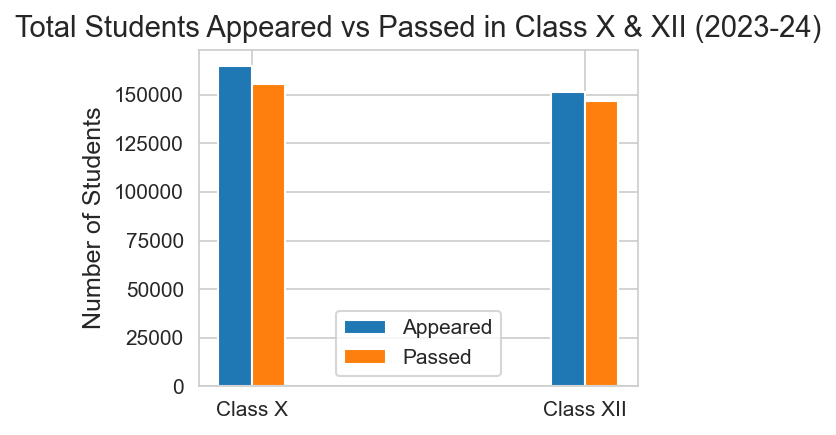

In [242]:


# Calculate totals
total_appeared_x = df["Appeared_Class_X"].sum()
total_passed_x = df["Passed_Class_X"].sum()
total_appeared_xii = df["Appeared_Class_XII"].sum()
total_passed_xii = df["Passed_Class_XII"].sum()

# Data
labels = ["Class X", "Class XII"]
appeared = [total_appeared_x, total_appeared_xii]
passed = [total_passed_x, total_passed_xii]

x = np.arange(len(labels))  # label locations
width = 0.1  # width of bars

plt.figure(figsize=(4,3))

# Bars
plt.bar(x - width/2, appeared, width, label="Appeared")
plt.bar(x + width/2, passed, width, label="Passed")

# Labels
plt.xticks(x, labels)
plt.ylabel("Number of Students")
plt.title("Total Students Appeared vs Passed in Class X & XII (2023-24)")
plt.legend()
plt.tight_layout()
plt.savefig('total_pass_appeared.png')
plt.show()


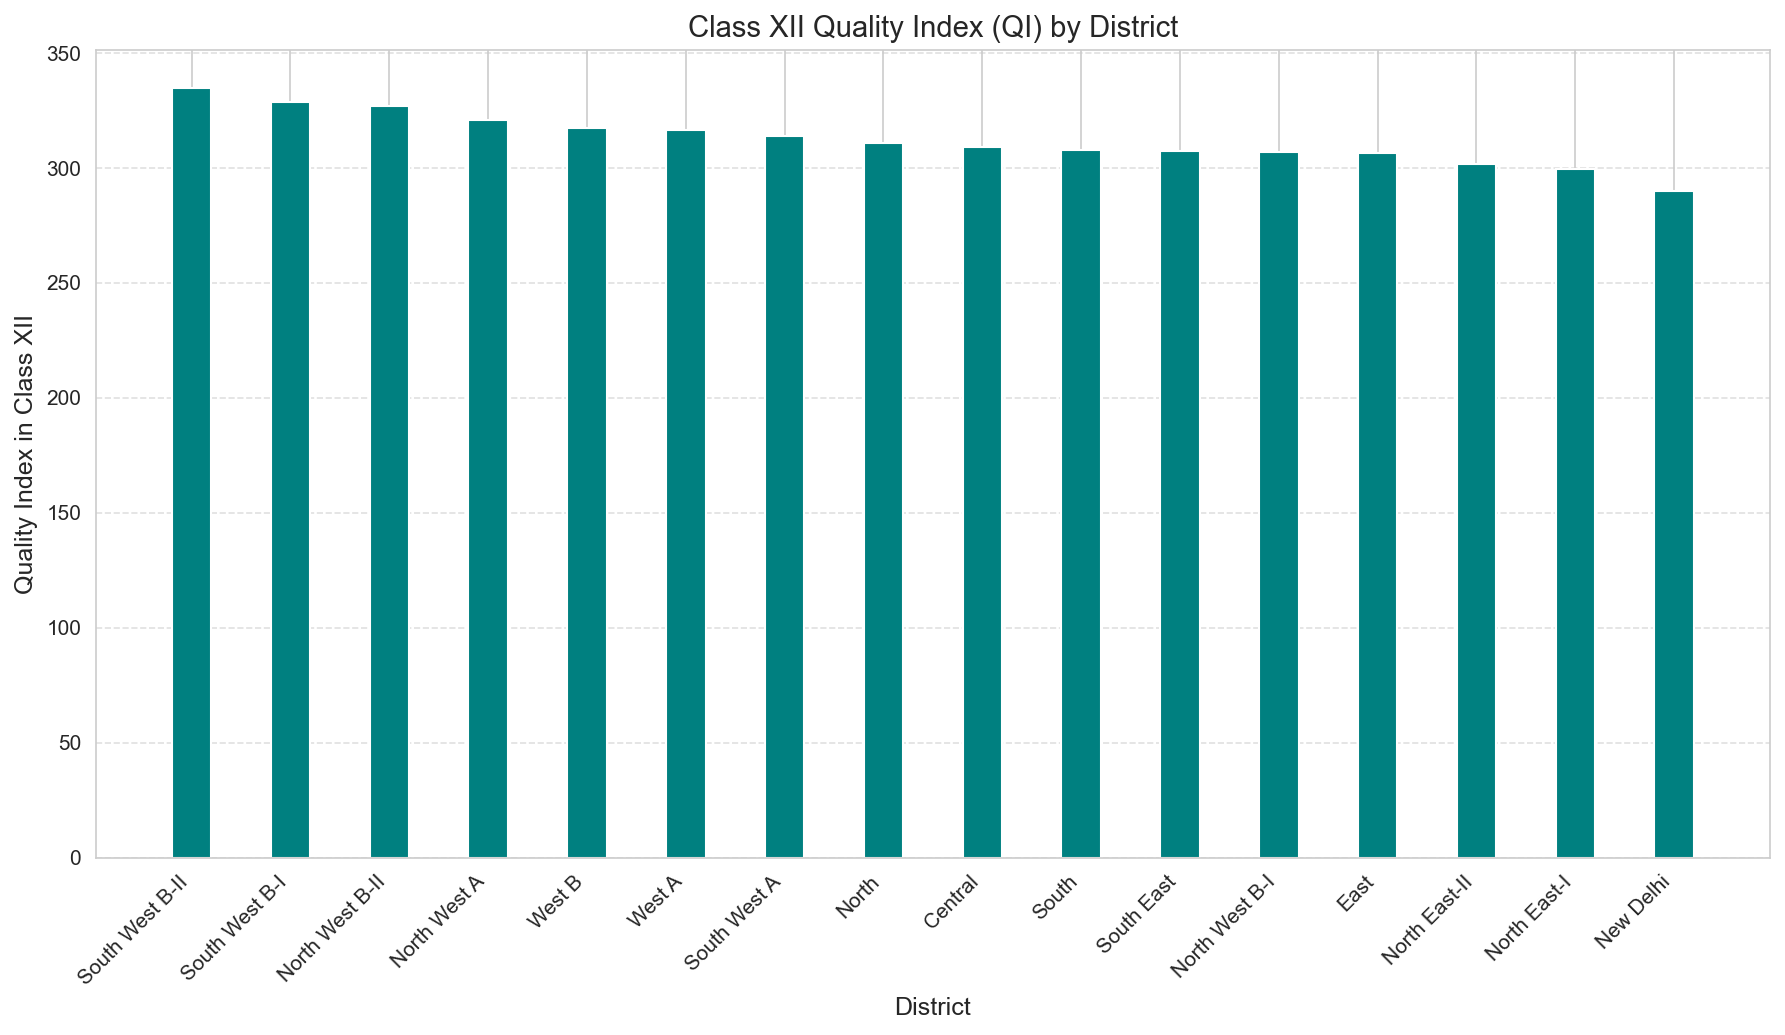

In [248]:
# Bar Plot: Class XII Quality Index by District (Comparison)  
df_sorted = df.sort_values('QI_Class_XII', ascending=False)

plt.figure(figsize=(12, 7))
plt.bar(df_sorted['District'], df_sorted['QI_Class_XII'], color='teal', width=0.4)
plt.title('Class XII Quality Index (QI) by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Quality Index in Class XII', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('classXII_QI.png')
plt.show()

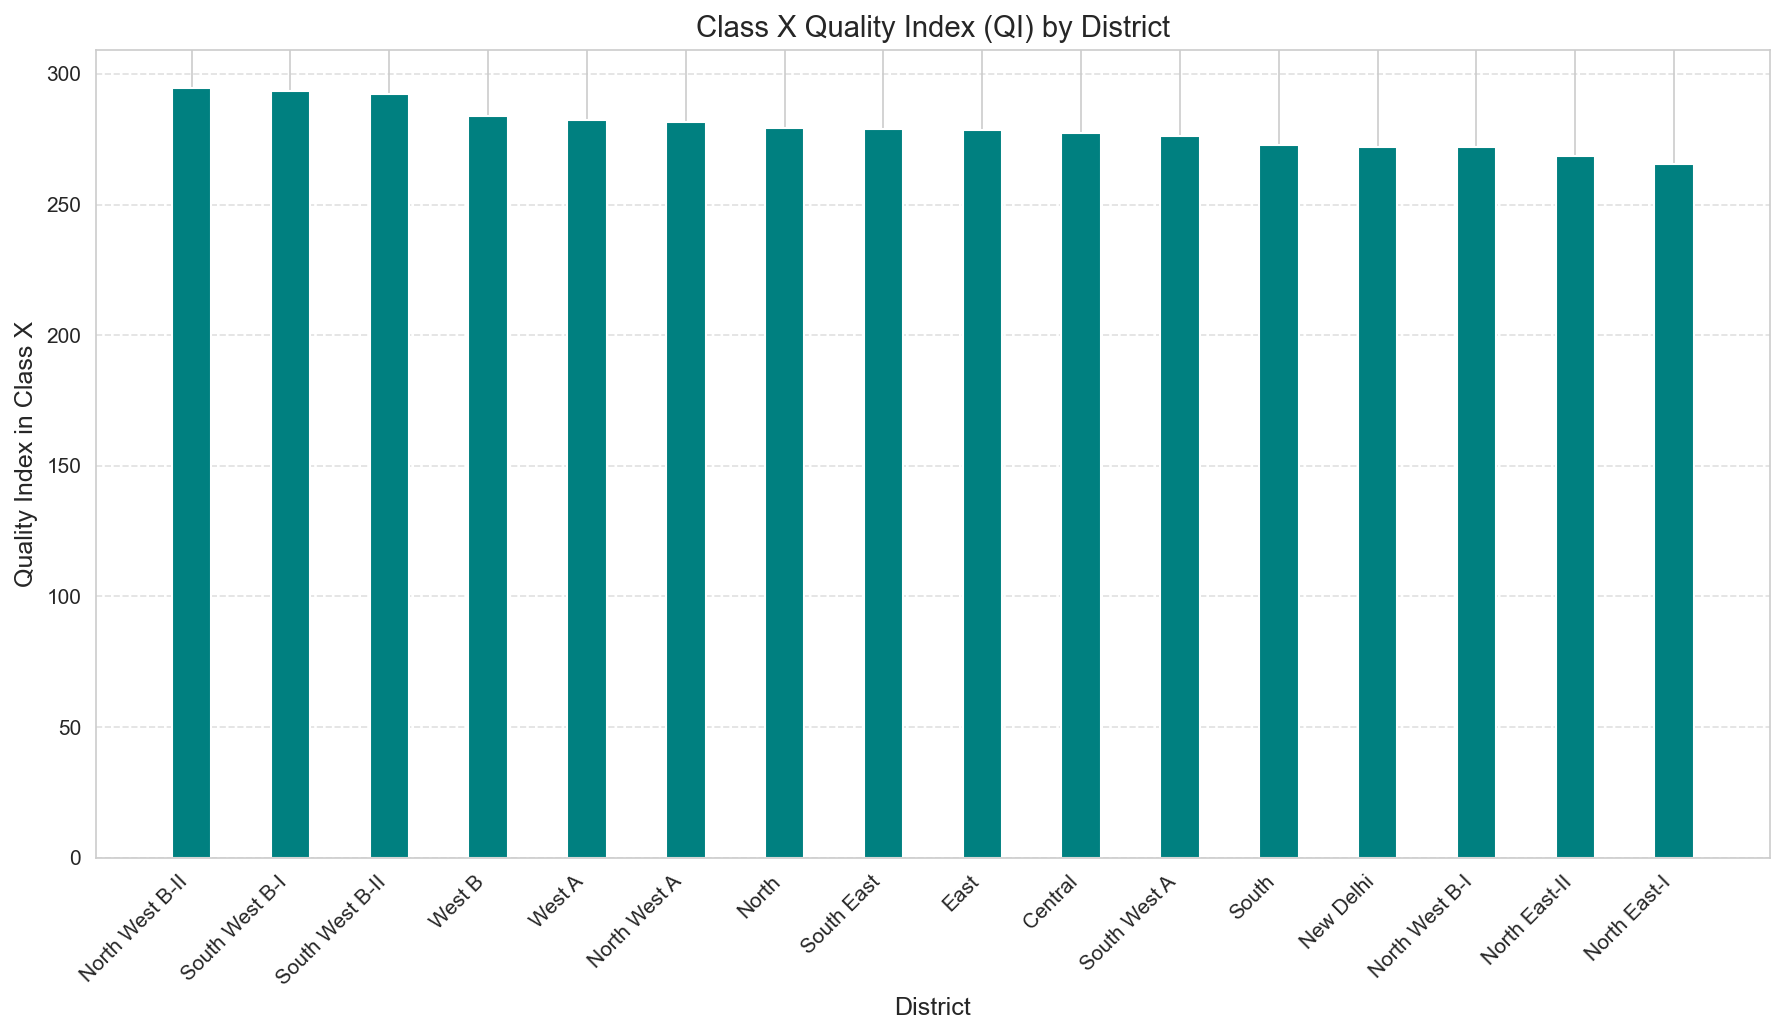

In [246]:
# Bar Plot: Class X Quality Index by District (Comparison)  
df_sorted = df.sort_values('QI_Class_X', ascending=False)

plt.figure(figsize=(12, 7))
plt.bar(df_sorted['District'], df_sorted['QI_Class_X'], color='teal', width=0.4)
plt.title('Class X Quality Index (QI) by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Quality Index in Class X', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('classX_QI.png')
plt.show()